In [7]:
import torch, os
import torch.nn.functional as F
import lightning as pl
from einops import rearrange
import matplotlib.pyplot as plt
from tqdm import tqdm
from einops import rearrange

from torchvision.utils import save_image, make_grid
from torchvision import transforms
from torchvision.datasets import MNIST

from modules.trainers.genmod import genmod

In [8]:
model = genmod.load_from_checkpoint('/home/exouser/genmod/genmod/6wpodkmr/checkpoints/last.ckpt')
model.eval()

genmod(
  (nn_model): ContextUnet_genmod(
    (init_conv): ResidualConvBlock(
      (conv1): Sequential(
        (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): GELU(approximate='none')
      )
      (conv2): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): GELU(approximate='none')
      )
    )
    (down1): UnetDown(
      (model): Sequential(
        (0): ResidualConvBlock(
          (conv1): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
            (2): GELU(approximate='none')
          )
          (conv2): Sequential(
            (0): Conv2d(12

100%|██████████| 20/20 [00:00<00:00, 212.72it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


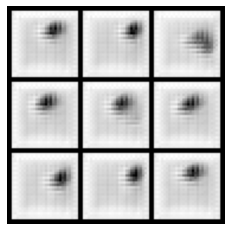

In [9]:
device = "cuda:0"

torch.cuda.empty_cache()

model = model.to(device)

gen_imgs = []
for _ in range(9):
    x_init = torch.randn((1,1,28,28)).to(device)  # x_T ~ N(0, 1), sample initial noise
    for i in tqdm(range(model.n_T, 1, -25)):
        t_input = torch.tensor([i / model.n_T]).to(device)
        t_input = t_input.repeat(x_i.size(0),1,1,1)
        t_output = torch.tensor([i-1 / model.n_T]).to(device)
        t_output = t_output.repeat(x_i.size(0),1,1,1)
        
        if i == model.n_T:
            x_i = model.nn_model(x_init, t_input, t_output)
        else:
            x_i = model.nn_model(x_i[:,1,:,:].unsqueeze(0), t_input, t_output)
    
    gen_imgs.append(x_i[:,1,:,:].detach().cpu())
    
gen_imgs = rearrange(gen_imgs, 'b c h w -> b c h w')
# create grid
grid = make_grid(gen_imgs*-1 + 1, nrow=3, padding=2)

# plot grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()

In [11]:
device = "cuda:0"

torch.cuda.empty_cache()

model = model.to(device)

gen_imgs = []
for _ in range(9):
    x_init = torch.randn((1,1,28,28)).to(device)  # x_T ~ N(0, 1), sample initial noise
    for i in tqdm(range(model.n_T-1, 0, -1)):
        t_input = torch.tensor([i / model.n_T]).to(device)
        t_input = t_input.repeat(x_i.size(0),1,1,1)
        t_output = torch.tensor([i-1 / model.n_T]).to(device)
        t_output = t_output.repeat(x_i.size(0),1,1,1)

        z = torch.randn_like(x_i).to(device) if i > 1 else 0
        
        if i == model.n_T-1:
            eps = model.nn_model(x_init, t_input, t_output)
        else:
            eps = model.nn_model(x_i, t_input, t_output)
            
        x_i = (
            model.oneover_sqrta[i] * (x_i - eps[:,0,:,:].unsqueeze(0) * model.mab_over_sqrtmab[i])
            + model.sqrt_beta_t[i] * z
        )

    gen_imgs.append(x_i.squeeze(0).detach().cpu())
    
gen_imgs = rearrange(gen_imgs, 'b c h w -> b c h w')
# create grid
grid = make_grid(gen_imgs*-1 + 1, nrow=3, padding=2)

# plot grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()

  0%|          | 1/499 [00:00<00:07, 63.43it/s]


RuntimeError: Given groups=1, weight of size [128, 1, 3, 3], expected input[1, 2, 28, 28] to have 1 channels, but got 2 channels instead

100%|██████████| 20/20 [00:00<00:00, 205.03it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


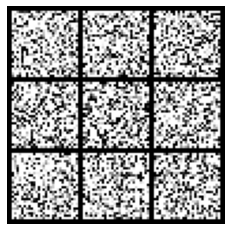

In [22]:
device = "cuda:0"

torch.cuda.empty_cache()

model = model.to(device)

gen_imgs = []
for _ in range(9):
    x_i = torch.randn((1,2,28,28)).to(device)  # x_T ~ N(0, 1), sample initial noise
    for i in tqdm(range(model.n_T-1, 1, -25)):
        t_input = torch.tensor([i / model.n_T]).to(device)
        t_input = t_input.repeat(x_i.size(0),1,1,1)
        t_output = torch.tensor([i-1 / model.n_T]).to(device)
        t_output = t_output.repeat(x_i.size(0),1,1,1)
        
        z = torch.randn_like(x_i[:,0,:,:].unsqueeze(0)).to(device) if i > 1 else 0
        
        if i == model.n_T-1:
            eps = model.nn_model(x_init, t_input, t_output)
        else:
            eps = model.nn_model(x_i, t_input, t_output)
            
        x_i = (
            model.oneover_sqrta[i] * (x_i[:,0,:,:].unsqueeze(0) - eps[:,0,:,:].unsqueeze(0) * model.mab_over_sqrtmab[i])
            + model.sqrt_beta_t[i] * z
        )
        
        
    
    gen_imgs.append(x_i.squeeze(1).detach().cpu())
    
gen_imgs = rearrange(gen_imgs, 'b c h w -> b c h w')
# create grid
grid = make_grid(gen_imgs*-1 + 1, nrow=3, padding=2)

# plot grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()